In [1]:
import pandas as pd
import numpy as py
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [13]:
edaData = pd.read_csv('clean-train-data.csv')
edaData.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Risk_Class
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,No Risk
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,No Risk
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,No Risk
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Risk
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Risk


# Univariate Visualisation

### Numeric Variables against Risk_Class

In [14]:
# Extracting the numeric data variables
numeric_data = pd.DataFrame(edaData[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])

# Summary Statistics for all Variables
numeric_data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


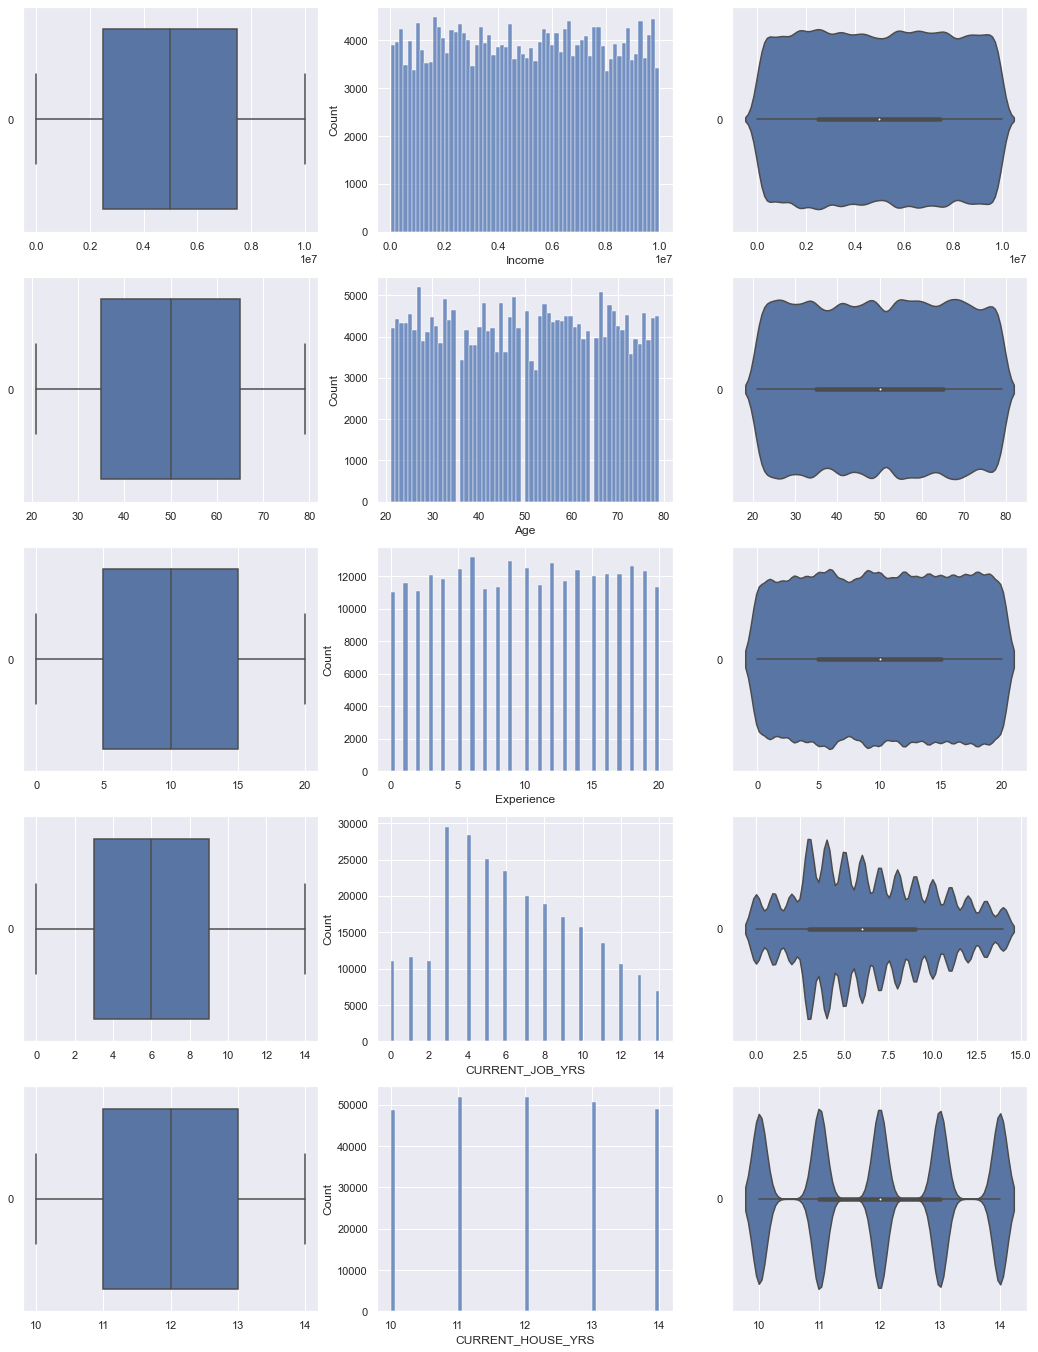

In [15]:
#Distribution of all the numeric variables against Risk_Class
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

#### Box Plot
For all the categories in numeric data, there are no outliers as there are no points that lie outside the whiskers of the boxplot. All the numeric variables are quite symmetric about its median.
#### Histogram
Income, Age, Experience and CURRENT_HOUSE_YRS have a relatively even distribution of data. As for CURRENT_JOB_YRS, there is a smaller data size for years 0-3 and 12 - 14. For years 3-12 for CURRENT_JOB_YRS, we have a larger data size. The year with the maximum number of data points for CURRENT_JOB_YRS is for those with 3 years at their current job .
#### Violin plots
For Income, Age, Experience and CURRENT_HOUSE_YRS, the violin plots are quite evenly distributed except for CURRENT_JOB_YRS which shows a large jump from those with 2 years of experience to 3.

# Bivariate Visualisation

### Numeric Variables against Numeric Variables

                     Income       Age  Experience  CURRENT_JOB_YRS  \
Income             1.000000 -0.000652    0.006422         0.007045   
Age               -0.000652  1.000000   -0.001118         0.002154   
Experience         0.006422 -0.001118    1.000000         0.646098   
CURRENT_JOB_YRS    0.007045  0.002154    0.646098         1.000000   
CURRENT_HOUSE_YRS -0.002397 -0.020134    0.019309         0.005372   

                   CURRENT_HOUSE_YRS  
Income                     -0.002397  
Age                        -0.020134  
Experience                  0.019309  
CURRENT_JOB_YRS             0.005372  
CURRENT_HOUSE_YRS           1.000000  


<AxesSubplot:>

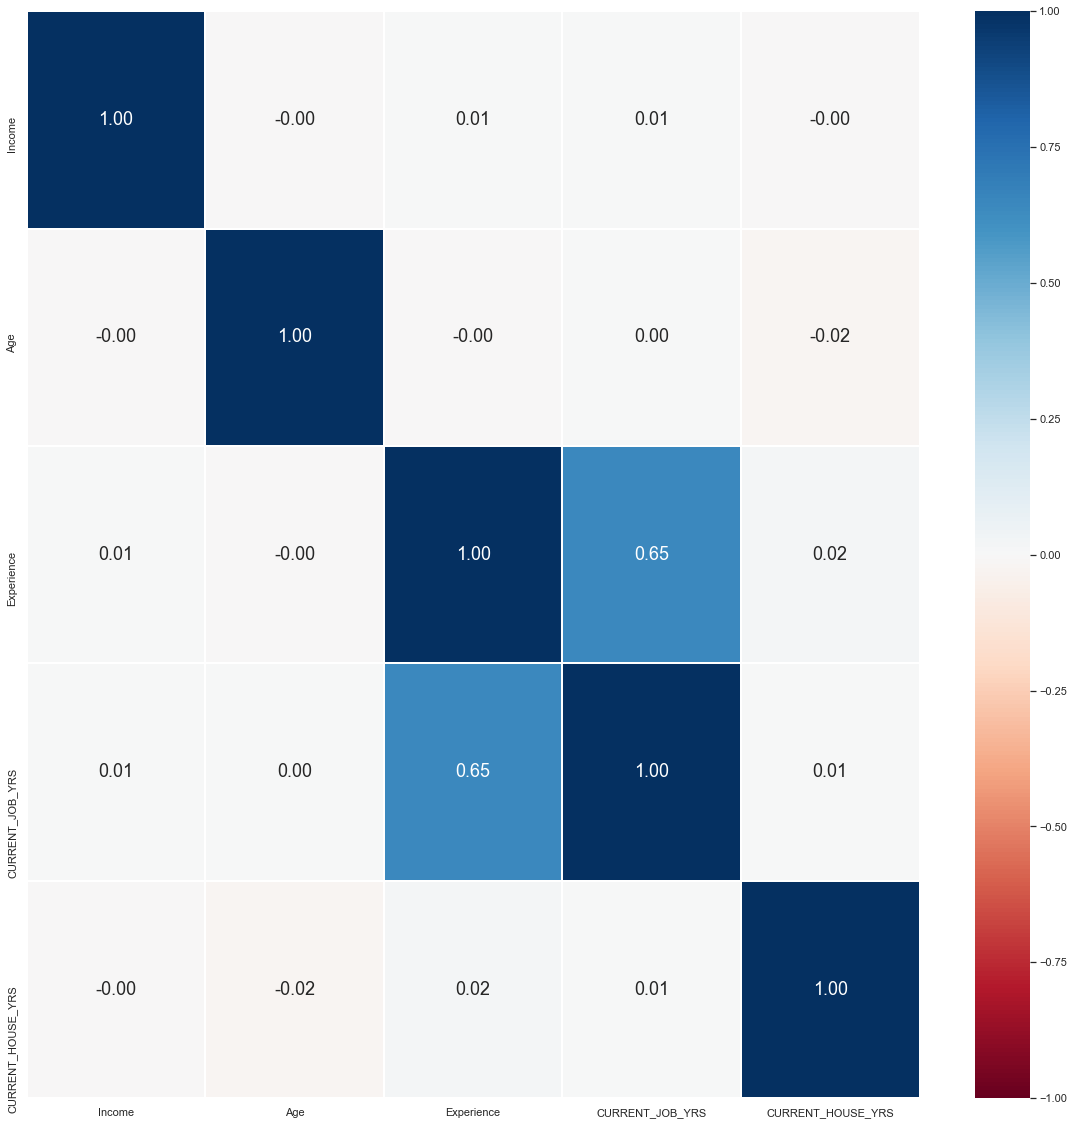

In [16]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

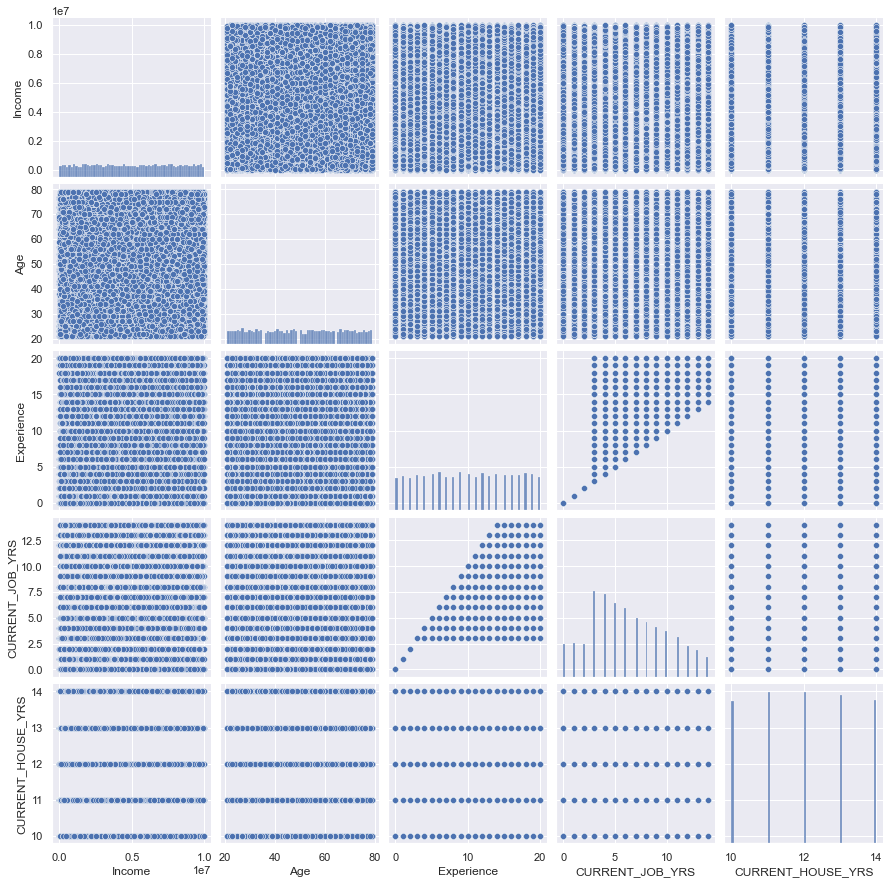

In [17]:
sb.pairplot(data = numeric_data)

There is little to no correlation between any two numeric variables with the exception being CURRENT_JOB_YRS and Experience which has a correlation of 0.65.

### Numeric Variables against Risk_Class

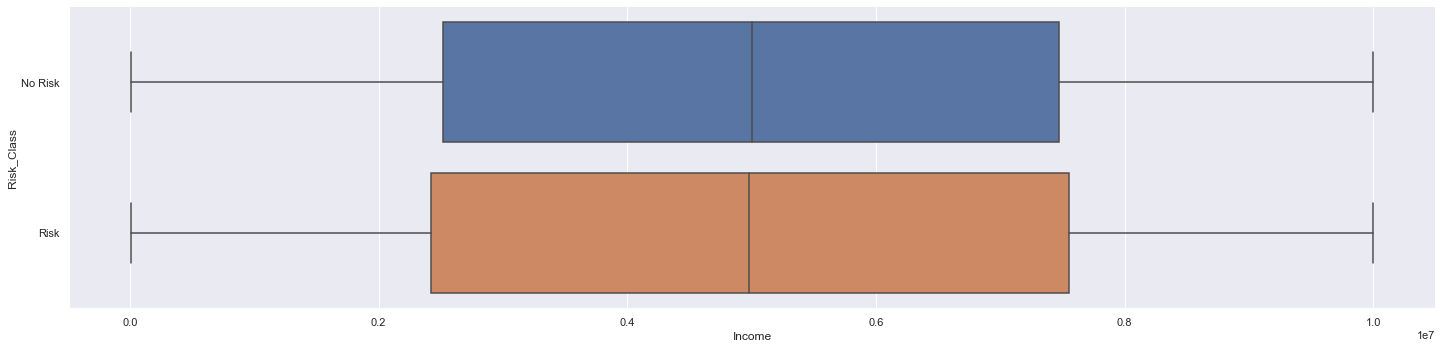

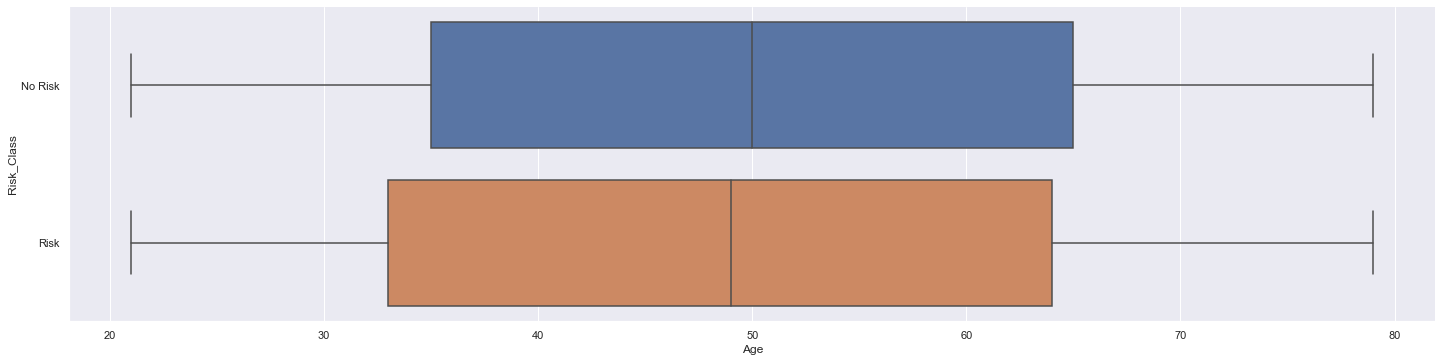

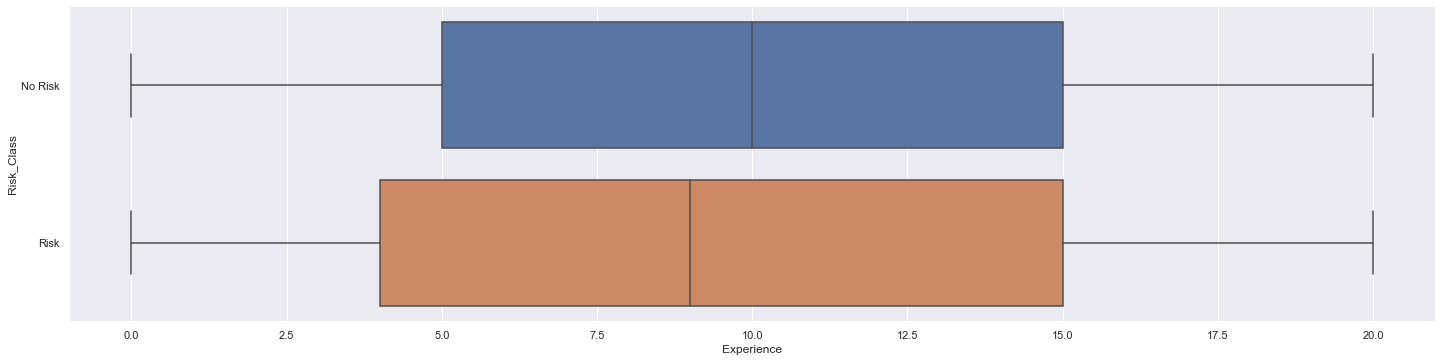

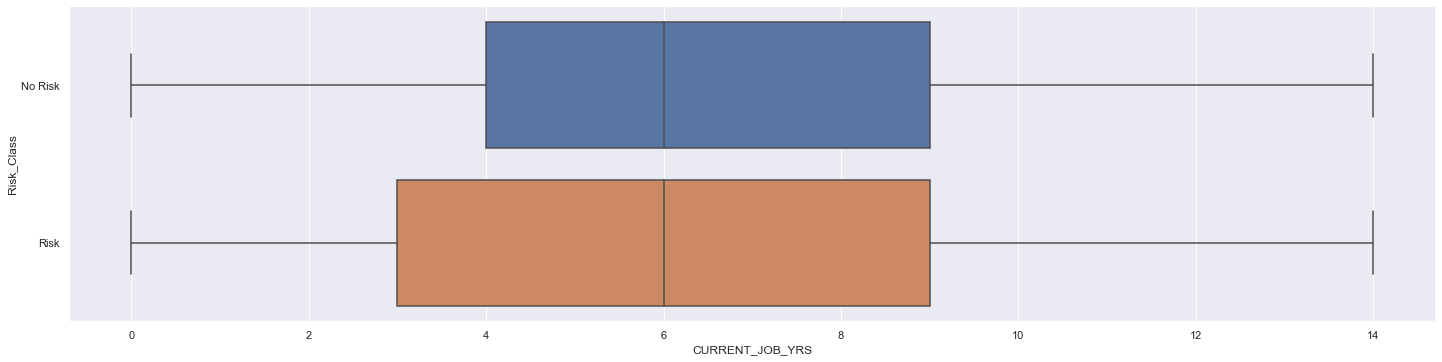

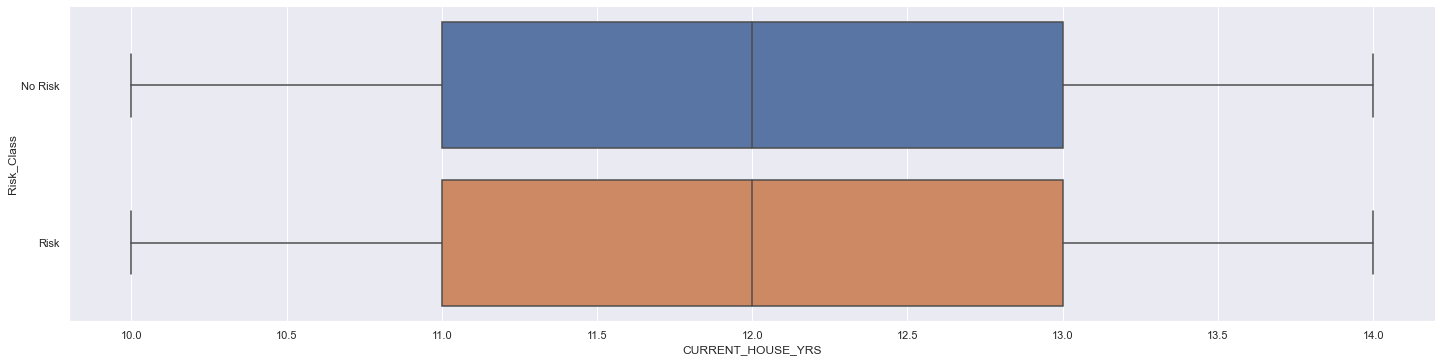

In [18]:
for columns in numeric_data:
    sb.catplot(x = columns, y = 'Risk_Class', data = edaData, kind = 'box', aspect = 4)

In [20]:
numeric_data2 = pd.DataFrame(edaData[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']])
numeric_data2.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


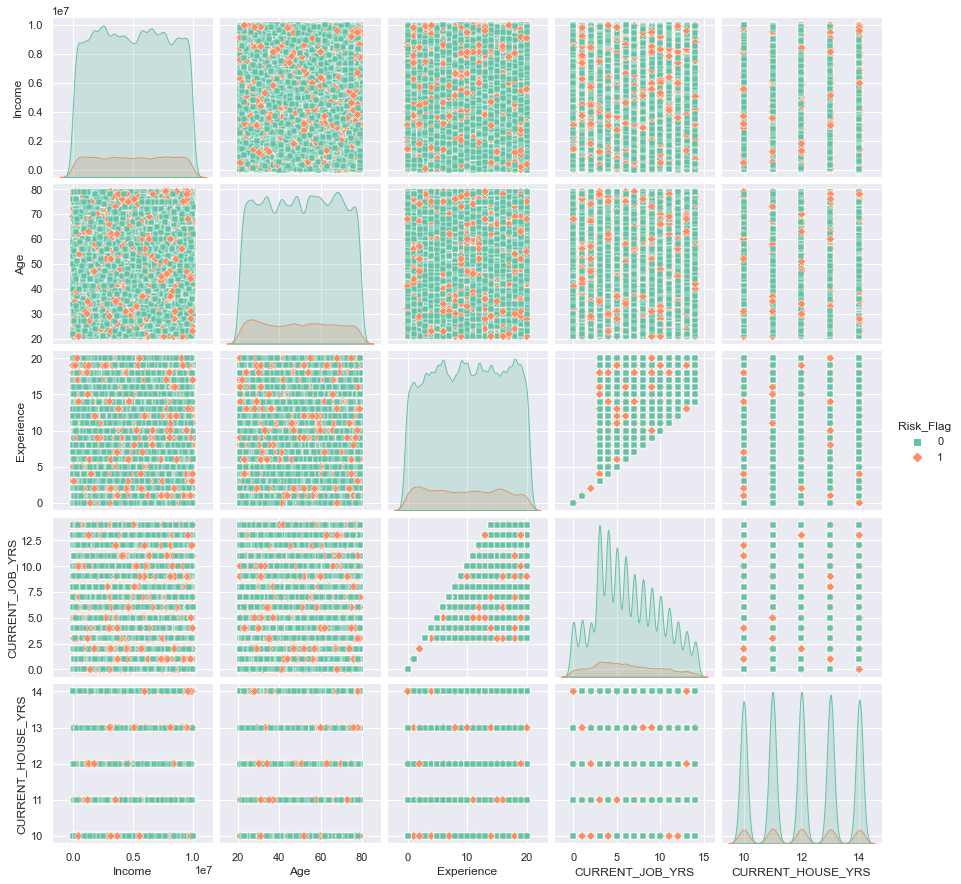

In [21]:
sns_plot = sb.pairplot(numeric_data2, kind = "scatter", hue = "Risk_Flag", markers=["s", "D"], palette="Set2")

From the boxplots, the distibution between Risk and No Risk are similar with the exception of Experience and CURRENT_JOB_YRS. Those that are said to have Risk have a lower lower quartile for these 2 variables. 

The correlogram shows the distribution for variables with Risk and No Risk based on the colour of the data points. From the correlogram, the kde plots for the variables are similar with the exception of CURRENT_JOB_YRS which has a large increase from the second year to the third year for No Risk and not much of an increase for Risk.

### Categorical Variables against Risk Class

#### Married/Single against Risk Class

<AxesSubplot:xlabel='Married/Single', ylabel='Risk_Class'>

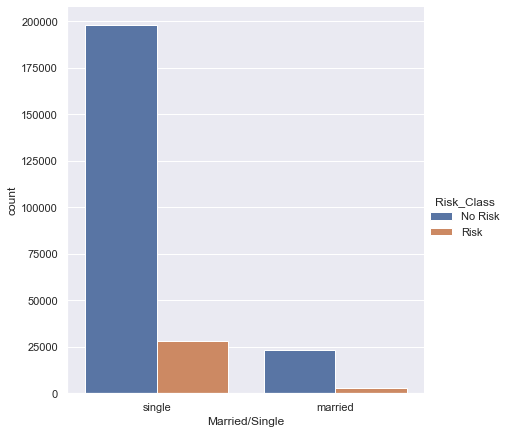

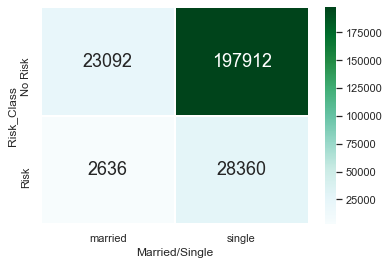

In [23]:
sb.catplot(data = edaData, kind = 'count', x = 'Married/Single', hue = 'Risk_Class', height = 6)
f = plt.figure(figsize=(6, 4))
sb.heatmap(edaData.groupby(['Risk_Class', 'Married/Single']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

* Highest proportion of `Single` with `No Risk`, lowest proportion of `Married` with `Risk`
* Similar proportion of `Single` with `Risk` and `Married` with `No Risk`


#### House_Ownership against Risk Class

<AxesSubplot:xlabel='House_Ownership', ylabel='Risk_Class'>

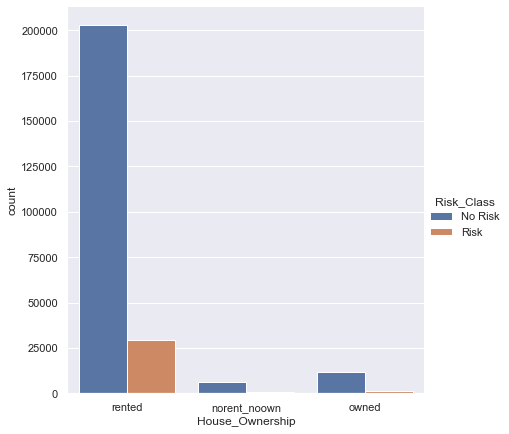

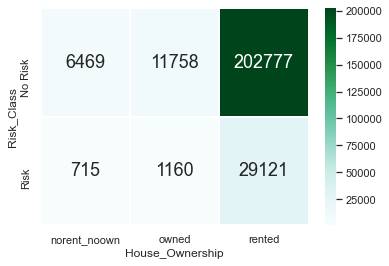

In [25]:
sb.catplot(data = edaData, kind = 'count', x = 'House_Ownership', hue = 'Risk_Class', height = 6)
f = plt.figure(figsize=(6, 4))
sb.heatmap(edaData.groupby(['Risk_Class', 'House_Ownership']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

* Highest proportion of `Rented` with `No Risk`, lowest proportion of `norent_noown` with `Risk`
* There is skewness of data possibly deal to the extremely high proportion of data classified under `Rented`

#### Car_Ownership against Risk Class 

<AxesSubplot:xlabel='Car_Ownership', ylabel='Risk_Class'>

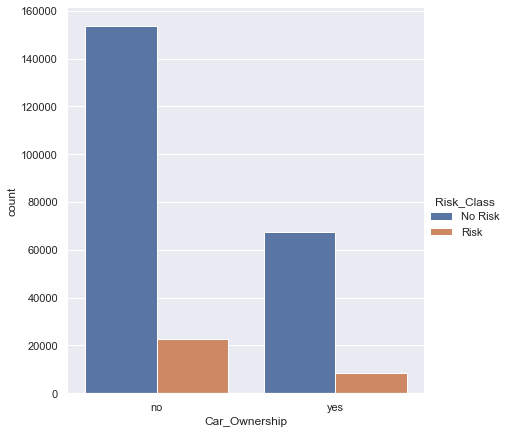

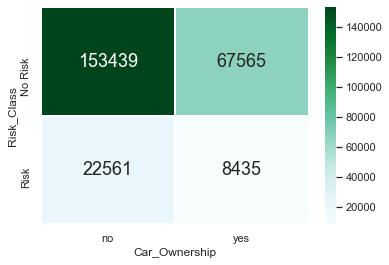

In [24]:
sb.catplot(data = edaData, kind = 'count', x = 'Car_Ownership', hue = 'Risk_Class', height = 6)
f = plt.figure(figsize=(6, 4))
sb.heatmap(edaData.groupby(['Risk_Class', 'Car_Ownership']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

* Highest proportion of individuals with `No Car` and `No Risk`, lowest proportion of individuals with `Car` and `Risk`

We have decided to exclude the Profession, CITY and STATE variables as there are too many categories to be analysed.